# Missing Values Part 2
Here we will deal with categorical columns containing missing values.

In [1]:
#Imoporting libraries
import pandas as pd
import numpy as np

In [2]:
#Loading the data with categorical columns
df=pd.read_csv('titanic.csv',usecols=['Pclass','Embarked','Cabin'])
df.head()
#Pclass may seem to be containing numeric values
#But those are discrete and represent Passenger Class i.e. 1: First Class, 2: Second Class, 3: Third Class
#Therefore it should be treated as an categorical column

,Pclass,Cabin,Embarked
0,3,NaN,S
1,1,C85,C
2,3,NaN,S
3,1,C123,S
4,3,NaN,S


In [3]:
#Getting the count of null values
df.isnull().sum()

Pclass        0
Cabin       687
Embarked      2
dtype: int64

In [4]:
#Percentage of null values in ascending order
df.isnull().mean().sort_values()

Pclass      0.000000
Embarked    0.002245
Cabin       0.771044
dtype: float64

In [5]:
#Frequency of the categorical values from 'Embarked' column
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

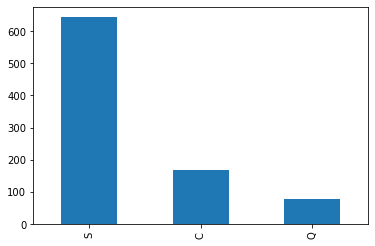

In [6]:
#Histogram of the 'Embarked'
df['Embarked'].value_counts().plot.bar();

In [7]:
#Frequency of the categorical values from the 'Pclass' column
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

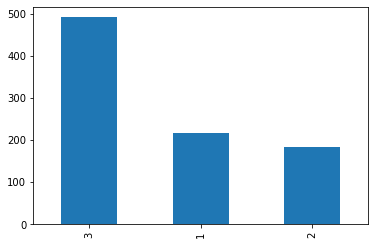

In [8]:
#Histogram of the 'Pclass'
df['Pclass'].value_counts().plot.bar();

In [9]:
#Most recurring value i.e. top value of the Embarked
df['Embarked'].value_counts().index[0]

'S'

In [10]:
#Second most recurring value
df['Embarked'].value_counts().index[1]

'C'

In [11]:
#Getting the most recurring value using .mode()
df['Embarked'].mode()[0]
#Here we are using indexing [0] because one can multiple modes havinf same frequency
#Indexing makes sure that the first most recurring value is considered

'S'

In [12]:
#Getting the most recurring value using .mode()
df['Cabin'].mode()[0]

'B96 B98'

#### Mode Imputation

In [13]:
#Defining function that fills the missing values with mode while creating a new column
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable+"_mode"]=df[variable].fillna(most_frequent_category)

In [14]:
#Applying the function on categorical columns
for feature in ['Pclass','Embarked','Cabin']:
    impute_nan(df,feature)

In [15]:
df.isnull().mean()

Pclass           0.000000
Cabin            0.771044
Embarked         0.002245
Pclass_mode      0.000000
Embarked_mode    0.000000
Cabin_mode       0.000000
dtype: float64

In [16]:
df.head()

,Pclass,Cabin,Embarked,Pclass_mode,Embarked_mode,Cabin_mode
0,3,NaN,S,3,S,B96 B98
1,1,C85,C,1,C,C85
2,3,NaN,S,3,S,B96 B98
3,1,C123,S,1,S,C123
4,3,NaN,S,3,S,B96 B98


#### Filling the missing values with 'missing'

In [17]:
#Loading the data again
df=pd.read_csv('titanic.csv', usecols=['Pclass','Embarked','Cabin'])
df.head()

,Pclass,Cabin,Embarked
0,3,NaN,S
1,1,C85,C
2,3,NaN,S
3,1,C123,S
4,3,NaN,S


In [18]:
#Defining a function that fills missing values with 'missing' while creating a new column
def impute_nan(df,variable):
    df[variable+"_newvar"]=np.where(df[variable].isnull(),'Missing',df[variable])

In [19]:
#Applying the function on categorical columns
for feature in ['Pclass','Embarked','Cabin']:
    impute_nan(df,feature)
df.head()

,Pclass,Cabin,Embarked,Pclass_newvar,Embarked_newvar,Cabin_newvar
0,3,NaN,S,3,S,Missing
1,1,C85,C,1,C,C85
2,3,NaN,S,3,S,Missing
3,1,C123,S,1,S,C123
4,3,NaN,S,3,S,Missing


In [20]:
#We can drop the columns once the missing values are filled
df.drop(['Pclass','Embarked','Cabin'], axis=1, inplace=True)
df.head()
#Another way :
#df=df.drop(['Pclass','Embarked','Cabin'], axis=1)

,Pclass_newvar,Embarked_newvar,Cabin_newvar
0,3,S,Missing
1,1,C,C85
2,3,S,Missing
3,1,S,C123
4,3,S,Missing


The End